In [5]:
import numpy as np
import pandas as pd
import yfinance as yf 
import datetime as dt

In [4]:
?yf.download

Signature:
yf.download(
    tickers,
    start=None,
    end=None,
    actions=False,
    threads=True,
    ignore_tz=None,
    group_by='column',
    auto_adjust=False,
    back_adjust=False,
    repair=False,
    keepna=False,
    progress=True,
    period='max',
    interval='1d',
    prepost=False,
    proxy=None,
    rounding=False,
    timeout=10,
    session=None,
)
Docstring:
Download yahoo tickers
:Parameters:
    tickers : str, list
        List of tickers to download
    period : str
        Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        Either Use period parameter or use start and end
    interval : str
        Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        Intraday data cannot extend last 60 days
    start: str
        Download start date string (YYYY-MM-DD) or _datetime, inclusive.
        Default is 99 years ago
        E.g. for start="2020-01-01", the first data point will be on "2020-01-01"
    end: str
        Download end date s

In [14]:
ticker = ["AAPL","GOOG","MSFT","META"]
start = dt.datetime.today()- dt.timedelta(3650) # 10 years worth of data 
cl_price = yf.download(tickers=ticker,
                      start = start,
                      end = dt.datetime.today())

[*********************100%%**********************]  4 of 4 completed


In [15]:
# closing prices for all tickers 
cl_price = cl_price["Close"]
cl_price.describe()

Ticker,AAPL,GOOG,META,MSFT
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,84.986877,74.586239,195.643213,166.128688
std,58.575443,40.180346,96.432900,111.754156
min,22.570000,24.560070,62.759998,40.290001
25%,32.141249,39.532751,123.724998,61.244999
50%,52.630001,59.424000,176.110001,132.100006
75%,145.209999,108.365002,254.180000,257.045013
max,198.110001,179.539993,527.340027,430.519989


In [17]:
cl_price.isna().sum()

Ticker
AAPL    0
GOOG    0
META    0
MSFT    0
dtype: int64

No null or nan values in cl_price for the past 10 years. 

# daily returns are much more important in quant than the abs stock price. 

In [20]:
daily_returns = cl_price.pct_change()
daily_returns

Ticker,AAPL,GOOG,META,MSFT
Date,,,,
2014-06-12,NaN,NaN,NaN,NaN
2014-06-13,-0.010944,0.000744,0.003266,0.016018
2014-06-16,0.010079,-0.013557,-0.004806,0.006549
2014-06-17,-0.001301,-0.002333,0.003272,0.004337
2014-06-18,0.001086,0.019079,0.018633,-0.000720
...,...,...,...,...
2024-06-03,0.009259,0.002644,0.022835,-0.003878
2024-06-04,0.001649,0.004071,-0.001047,0.006167
2024-06-05,0.007821,0.011077,0.037883,0.019083


In [21]:
# we can also do this way:
cl_price/cl_price.shift(1)

Ticker,AAPL,GOOG,META,MSFT
Date,,,,
2014-06-12,NaN,NaN,NaN,NaN
2014-06-13,0.989056,1.000744,1.003266,1.016018
2014-06-16,1.010079,0.986443,0.995194,1.006549
2014-06-17,0.998699,0.997667,1.003272,1.004337
2014-06-18,1.001086,1.019079,1.018633,0.999280
...,...,...,...,...
2024-06-03,1.009259,1.002644,1.022835,0.996122
2024-06-04,1.001649,1.004071,0.998953,1.006167
2024-06-05,1.007821,1.011077,1.037883,1.019083


In [28]:
print(
    daily_returns.mean(),
    daily_returns.std() # volatility measure 
)

Ticker
AAPL    0.001013
GOOG    0.000895
META    0.001091
MSFT    0.001079
dtype: float64 Ticker
AAPL    0.017850
GOOG    0.017724
META    0.023538
MSFT    0.017052
dtype: float64


# Visualization

In [32]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

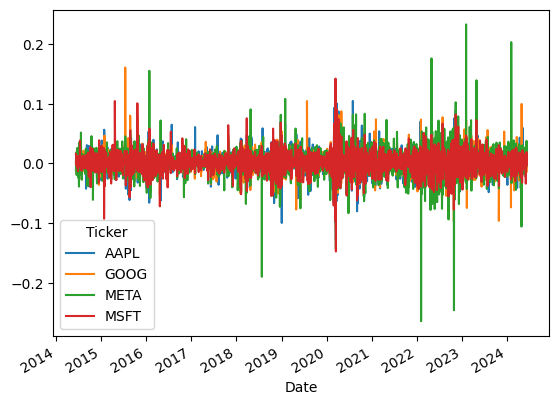

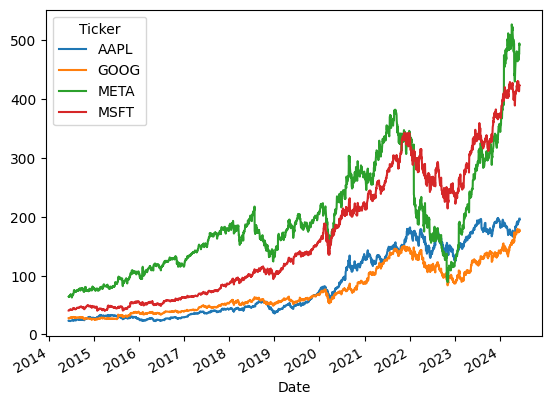

In [44]:
daily_returns.plot()
cl_price.plot()

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

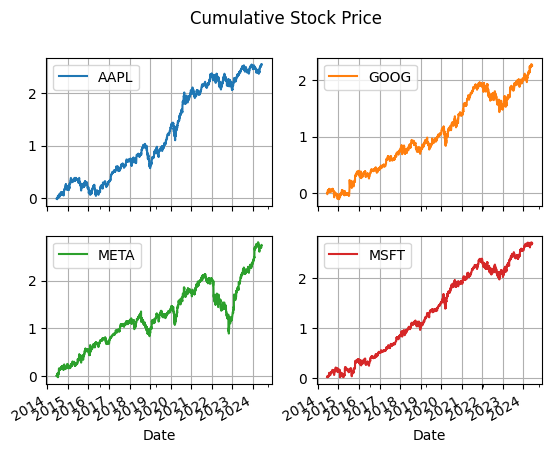

In [47]:
daily_returns.cumsum().plot(subplots = True, 
                           layout = (2,2),
                            title = "Cumulative Stock Price",
                            grid = True)
# this is an irrational and not useful quantity in quant finance

#### compounded returns are what we need.

<Axes: xlabel='Date'>

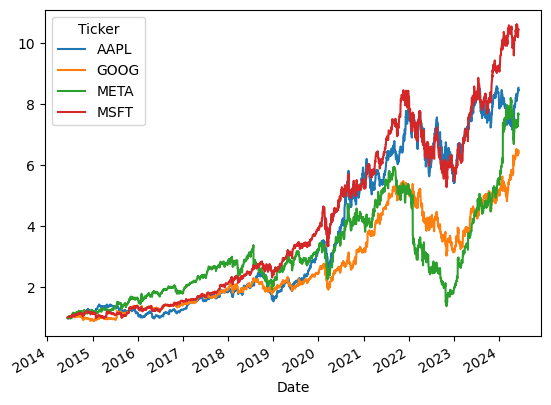

In [53]:
(1 + daily_returns).cumprod().plot()

<BarContainer object of 4 artists>

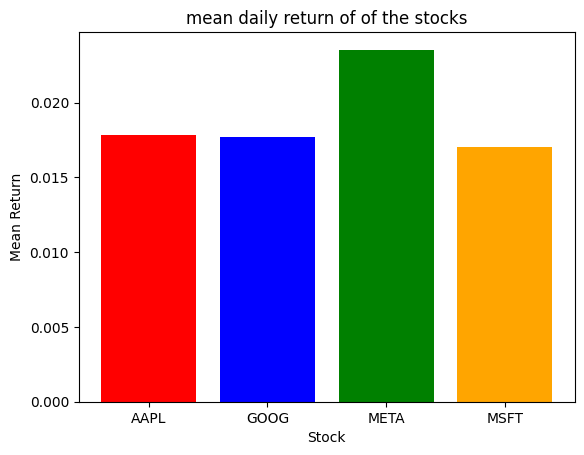

In [57]:
fig, ax = plt.subplots()
ax.set(title = "mean daily return of of the stocks",
      xlabel = "Stock",
      ylabel = "Mean Return")
ax.bar(x = daily_returns.columns, 
       height = daily_returns.std(),
       color = ["red","blue","green","orange"]
      )

In [58]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']